# ------------------------------------------ Venilla Network--------------------------------



#Mounting Google drive

accessing google drive / authendication

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras                                                                                        
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


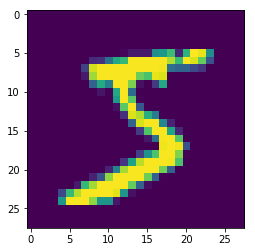

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

##Reshaping the x_train and x_test

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

##Pixel Normalization

Dividing by 255 , (highest value  the pixel )

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

##Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Buiding a sequential model

In [11]:
model = Sequential() 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) 


model.add(Convolution2D(16, 3, 3, activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10,1,activation='relu'))


model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Convolution2D(16, 3, 3, activation='relu'))

model.add(Convolution2D(32, 3, 3, activation='relu'))



model.add(Convolution2D(10,1))

model.add(Convolution2D(10,6))
model.add(Flatten())                                                        
model.add(Activation('softmax'))                                            

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 10)        910       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          1456      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          4640      
__________

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 10)        910       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          1456      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          4640      
__________

##Importing Model checkpoint

The model check point is used to store the model weight at specific points

In [0]:
# from keras.callbacks import  ModelCheckpoint

# filepath="/content/gdrive/My Drive/Colab Notebooks/EVA/epochs:{epoch:03d}-acc:{val_acc:.3f}.hdf5"
# #file path store weights in google drive

# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# # Store the weights when the validation accuracy increases

##Compiling the model

categorical_crossentropy is used as loss function

Adam with learning rate of 0.001 is optimizer

Accuracy is taken as metric

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
             metrics=['accuracy'])

##Fitting / Training the model

batch size  = 32 images
Epochs  =  10

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,
          #callbacks=[checkpoint],
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.1991 - acc: 0.9392 - val_loss: 0.0529 - val_acc: 0.9825
Epoch 2/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.0645 - acc: 0.9801 - val_loss: 0.0514 - val_acc: 0.9826
Epoch 3/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0496 - acc: 0.9852 - val_loss: 0.0424 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0426 - acc: 0.9865 - val_loss: 0.0431 - val_acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.0355 - acc: 0.9888 - val_loss: 0.0452 - val_acc: 0.9853
Epoch 6/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0323 - acc: 0.9899 - val_loss: 0.0294 - val_acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0274 - acc: 0.9915 - val_loss: 0.